In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
# Generamos datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos modelos
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier()

# Inicializamos la fusion por votacion
voting_clf = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('knn', model3)], voting='hard')

# Entrenamos el modelo
voting_clf.fit(X_train, y_train)

# Realizamos la prediccion
y_pred = voting_clf.predict(X_test)

# Calculamos la precision
accuracy = accuracy_score(y_test, y_pred)

print("El modelo de fusión por votación ha sido entrenado y evaluado con éxito.")

if accuracy > 0.8:
    print("¡Excelente! El modelo tiene una precision de", accuracy, "lo que indica un rendimiento muy bueno.")
elif accuracy > 0.6:
    print("Buen trabajo. El modelo tiene una precision de", accuracy, "lo que sugiere un rendimiento razonable.")
elif accuracy > 0.5:
    print("El modelo tiene una precision de", accuracy, "lo que indica un rendimiento mediocre. Se pueden hacer mejoras.")
else:
    print("El modelo tiene una precision muy baja de", accuracy, ". Se recomienda mejorar el modelo o revisar los datos.")

El modelo de fusión por votación ha sido entrenado y evaluado con éxito.
¡Excelente! El modelo tiene una precisión de 0.885 lo que indica un rendimiento muy bueno.


In [ ]:
# Datos simulados para entrena
X_train = [[37.1, 0], [37.6, 1], [38.0, 0], [37.9, 1], [37.3, 1], [38.5, 0], [37.2, 0], [38.3, 1], [38.1, 1]]  # Temperatura corporal y tos (0: No, 1: Sí)
y_train = ['fiebre', 'gripe', 'fiebre', 'gripe', 'gripe', 'fiebre', 'fiebre', 'gripe', 'gripe']  # Etiquetas

# Inicializamos modelos
model1 = DecisionTreeClassifier()
model2 = GaussianNB()

# Inicializamos la fusion por votacion
voting_clf = VotingClassifier(estimators=[('dt', model1), ('nb', model2)], voting='hard')

# Entrenamos el modelo de votacion
voting_clf.fit(X_train, y_train)

# Datos simulados para prediccion
X_test = [[37.5, 0], [38.2, 1], [37.8, 0], [38.4, 1], [37.7, 1]]  # Ejemplos de temperatura y tos del paciente

# Realizamos la prediccion
y_pred = voting_clf.predict(X_test)

print("Resultados de la predicción:")
for i in range(len(X_test)):
    print("Temperatura:", X_test[i][0], " Tos:", "Sí" if X_test[i][1] == 1 else "No", "->", y_pred[i])

Resultados de la predicción:
Temperatura: 37.5  Tos: No -> fiebre
Temperatura: 38.2  Tos: Sí -> gripe
Temperatura: 37.8  Tos: No -> fiebre
Temperatura: 38.4  Tos: Sí -> gripe
Temperatura: 37.7  Tos: Sí -> gripe


In [ ]:
calificaciones = np.array([[50, 60, 70], [40, 50, 60], [30, 40, 50], [60, 70, 80], [70, 80, 90]])

# Importancia de cada materia para determinar si va perdiendo el año
importancia_materias = np.array([0.4, 0.3, 0.3])

def fusion_ponderada(calificaciones, importancia):
    """
    Que hace?
    Funde las calificaciones de un conjunto de materias mediante una ponderacion.

    Los parametros:
      calificaciones: Un iterable de calificaciones de las materias.
      importancia: Un iterable de la importancia de cada materia.

    Retorna:
      La probabilidad fusionada de perder el año.
    """
    suma_ponderada = np.sum(calificaciones * importancia, axis=1)
    suma_importancia = np.sum(importancia)
    return suma_ponderada / suma_importancia

# Prediccion de la probabilidad de perder el año
probabilidad_perder_ano = fusion_ponderada(calificaciones, importancia_materias)

print("Probabilidad de perder el año para cada estudiante:")
for i, probabilidad in enumerate(probabilidad_perder_ano):
    print(f"Estudiante {i+1}: {probabilidad}")

# Umbral para determinar si va perdiendo el año
umbral = 0.5

print("\nResultados:")
for i, probabilidad in enumerate(probabilidad_perder_ano):
    if probabilidad >= umbral:
        print(f"Estudiante {i+1}: Es probable que vaya perdiendo el año.")
    else:
        print(f"Estudiante {i+1}: Es poco probable que vaya perdiendo el año.")


Probabilidad de perder el año para cada estudiante:
Estudiante 1: 59.0
Estudiante 2: 49.0
Estudiante 3: 39.0
Estudiante 4: 69.0
Estudiante 5: 79.0

Resultados:
Estudiante 1: Es probable que vaya perdiendo el año.
Estudiante 2: Es probable que vaya perdiendo el año.
Estudiante 3: Es probable que vaya perdiendo el año.
Estudiante 4: Es probable que vaya perdiendo el año.
Estudiante 5: Es probable que vaya perdiendo el año.


Error cuadrático medio (Fusión Promedio Ponderado - Exp. 1): 326.1782759270727
Error cuadrático medio (Fusión Promedio Ponderado - Exp. 2): 357.7574947741397
Error cuadrático medio (Fusión por Votación - Voto Blando): 326.1782759270727
Error cuadrático medio (Stacking): 158.92828735026222
Error cuadrático medio (Stacking con SVM): 177.6338522247181


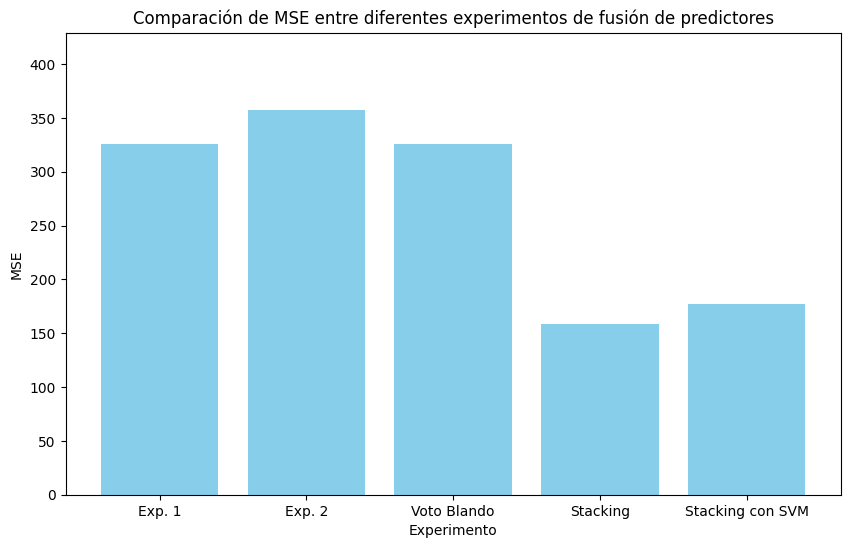

El mejor modelo es: Stacking


In [ ]:
def generar_datos():
    """
    Generamos los datos de ejemplo para simular precios historicos de una accion X
    Y Retornamos los precios historicos y el precio actual.
    """
    np.random.seed(42)
    precios_historicos = np.random.randint(80, 120, size=(100, 3))
    precio_actual = np.random.randint(100, 150, size=100)
    return precios_historicos, precio_actual

def experimento_fusion_promedio_ponderado(precios_historicos, precio_actual, pesos):
    """
    Realizamos un experimento de fusion promedio ponderado con los pesos dados.
    Retorna el error cuadratico medio entre las predicciones y los valores reales.
    """
    X_train, X_test, y_train, y_test = train_test_split(precios_historicos, precio_actual, test_size=0.2, random_state=42)

    # Inicializamos modelos
    model_rf = RandomForestRegressor(random_state=42)
    model_gb = GradientBoostingRegressor(random_state=42)
    model_lr = LinearRegression()
    model_svr = SVR(kernel='linear')

    # Entrenamos modelos
    model_rf.fit(X_train, y_train)
    model_gb.fit(X_train, y_train)
    model_lr.fit(X_train, y_train)
    model_svr.fit(X_train, y_train)

    # Hacemos predicciones de cada model
    pred_rf = model_rf.predict(X_test)
    pred_gb = model_gb.predict(X_test)
    pred_lr = model_lr.predict(X_test)
    pred_svr = model_svr.predict(X_test)

    # Fusionamos las predicciones utilizando un promedio ponderado
    pred_fusion = np.average([pred_rf, pred_gb, pred_lr, pred_svr], axis=0, weights=pesos)

    # Calculamos el error cuadratico medio
    mse = mean_squared_error(y_test, pred_fusion)
    return mse

def experimento_fusion_votacion_blando(precios_historicos, precio_actual):
    """
    Realiza un experimento de fusión por votacion con voto blando.
    Retorna el error cuadrático medio entre las predicciones y los valores reales.
    """
    X_train, X_test, y_train, y_test = train_test_split(precios_historicos, precio_actual, test_size=0.2, random_state=42)

    # Inicializamos modelos
    model_rf = RandomForestRegressor(random_state=42)
    model_gb = GradientBoostingRegressor(random_state=42)
    model_lr = LinearRegression()
    model_svr = SVR(kernel='linear')

    # Entrenamos modelos
    model_rf.fit(X_train, y_train)
    model_gb.fit(X_train, y_train)
    model_lr.fit(X_train, y_train)
    model_svr.fit(X_train, y_train)

    # Hacemos predicciones de cada modelo
    pred_rf = model_rf.predict(X_test)
    pred_gb = model_gb.predict(X_test)
    pred_lr = model_lr.predict(X_test)
    pred_svr = model_svr.predict(X_test)

    # Fusionamos las predicciones utilizando voto blando
    pred_fusion = (pred_rf + pred_gb + pred_lr + pred_svr) / 4

    # Calculamos el error cuadratico medio
    mse = mean_squared_error(y_test, pred_fusion)
    return mse

def experimento_stacking(precios_historicos, precio_actual):
    """
    Realizamos un experimento de stacking.
    Retornamos el error cuadratico medio entre las predicciones y los valores reales.
    """
    X_train, X_test, y_train, y_test = train_test_split(precios_historicos, precio_actual, test_size=0.2, random_state=42)

    # Inicializamos modelos
    model_rf = RandomForestRegressor(random_state=42)
    model_gb = GradientBoostingRegressor(random_state=42)
    model_lr = LinearRegression()
    model_svr = SVR(kernel='linear')

    # Entrenamos modelos
    model_rf.fit(X_train, y_train)
    model_gb.fit(X_train, y_train)
    model_lr.fit(X_train, y_train)
    model_svr.fit(X_train, y_train)

    # Hacemos predicciones de cada modelo
    pred_rf = model_rf.predict(X_test)
    pred_gb = model_gb.predict(X_test)
    pred_lr = model_lr.predict(X_test)
    pred_svr = model_svr.predict(X_test)

    # Creamos un conjunto de caracteristicas para el modelo de nivel superior
    X_stacking = np.column_stack((pred_rf, pred_gb, pred_lr, pred_svr))

    # Inicializamos y entrenamos el modelo de nivel superior (regresion lineal)
    model_stacking = LinearRegression()
    model_stacking.fit(X_stacking, y_test)

    # Hacemos predicciones de stacking
    pred_fusion = model_stacking.predict(X_stacking)

    # Calculamos el error cuadratico medio
    mse = mean_squared_error(y_test, pred_fusion)
    return mse

def experimento_stacking_svm(precios_historicos, precio_actual):
    """
    Realizamos un experimento de stacking con un modelo SVM de nivel superior.
    Retornamos el error cuadrático medio entre las predicciones y los valores reales.
    """
    X_train, X_test, y_train, y_test = train_test_split(precios_historicos, precio_actual, test_size=0.2, random_state=42)

    # Inicializamos modelos
    model_rf = RandomForestRegressor(random_state=42)
    model_gb = GradientBoostingRegressor(random_state=42)
    model_lr = LinearRegression()
    model_svr = SVR(kernel='linear')

    # Entrenamos modelos
    model_rf.fit(X_train, y_train)
    model_gb.fit(X_train, y_train)
    model_lr.fit(X_train, y_train)
    model_svr.fit(X_train, y_train)

    # Hacemos predicciones de cada modelo
    pred_rf = model_rf.predict(X_test)
    pred_gb = model_gb.predict(X_test)
    pred_lr = model_lr.predict(X_test)
    pred_svr = model_svr.predict(X_test)

    # Creamos un conjunto de caracteristicas para el modelo de nivel superior
    X_stacking = np.column_stack((pred_rf, pred_gb, pred_lr, pred_svr))

    # Inicializamos y entrenamos el modelo de nivel superior (SVM)
    model_stacking_svm = SVR(kernel='linear')
    model_stacking_svm.fit(X_stacking, y_test)

    # Hacemos predicciones del modelo de stacking con SVM
    pred_fusion = model_stacking_svm.predict(X_stacking)

    # Calculamos el error cuadratico medio
    mse = mean_squared_error(y_test, pred_fusion)
    return mse

# Generamos datos de ejemplo
precios_historicos, precio_actual = generar_datos()

# Realizamos los experimentos
pesos_exp1 = [0.25, 0.25, 0.25, 0.25]
pesos_exp2 = [0.4, 0.3, 0.2, 0.1]
mse_exp1 = experimento_fusion_promedio_ponderado(precios_historicos, precio_actual, pesos_exp1)
mse_exp2 = experimento_fusion_promedio_ponderado(precios_historicos, precio_actual, pesos_exp2)
mse_voto_blando = experimento_fusion_votacion_blando(precios_historicos, precio_actual)
mse_stacking = experimento_stacking(precios_historicos, precio_actual)
mse_stacking_svm = experimento_stacking_svm(precios_historicos, precio_actual)

print("Error cuadrático medio (Fusión Promedio Ponderado - Exp. 1):", mse_exp1)
print("Error cuadrático medio (Fusión Promedio Ponderado - Exp. 2):", mse_exp2)
print("Error cuadrático medio (Fusión por Votación - Voto Blando):", mse_voto_blando)
print("Error cuadrático medio (Stacking):", mse_stacking)
print("Error cuadrático medio (Stacking con SVM):", mse_stacking_svm)

# Visualizamos
experimentos = ['Exp. 1', 'Exp. 2', 'Voto Blando', 'Stacking', 'Stacking con SVM']
mses = [mse_exp1, mse_exp2, mse_voto_blando, mse_stacking, mse_stacking_svm]

plt.figure(figsize=(10, 6))
plt.bar(experimentos, mses, color='skyblue')
plt.title('Comparación de MSE entre diferentes experimentos de fusión de predictores')
plt.xlabel('Experimento')
plt.ylabel('MSE')
plt.ylim(0, max(mses) * 1.2)
plt.show()


# Guardamos los resultados en un diccionario
resultados = {
    'Fusión Promedio Ponderado - Exp. 1': mse_exp1,
    'Fusión Promedio Ponderado - Exp. 2': mse_exp2,
    'Fusión por Votación - Voto Blando': mse_voto_blando,
    'Stacking': mse_stacking,
    'Stacking con SVM': mse_stacking_svm
}

# Encontramos el modelo con el menor MSE
mejor_modelo = min(resultados, key=resultados.get)
print("El mejor modelo es:", mejor_modelo)


# Apoyos bibliográficos:

https://cienciadedatos.net/documentos/py10-regresion-lineal-python

https://joserzapata.github.io/courses/python-ciencia-datos/ml/

https://keyrus.com/sp/es/insights/las-11-tecnicas-mas-utilizadas-en-el-modelado-de-analisis-predictivos

https://bookdown.org/keilor_rojas/CienciaDatos/aprendizaje-autom%C3%A1tico-machine-learning.html